## Country on Poverty Clustering

Dalam Notebook ini, saya akan menganalisis Clustering negara-negara yang masih berkembang atau sudah maju berdasarkan fitur-fitur dibawah ini, dari tingkat kelahiran anak, kematian anak, anggaran kesehatan, eksport, import, pendapatan per kapita sampai GDP. Hal ini tentunya untuk melihat bagaimana perbedaan negara maju ataupun negara yang masih berkembang. 

Hasil analisis ini tentunya bisa menjadi acuan negara yang masih berkembang untuk bisa meningkatkan negara nya untuk supaya lebih baik dan maju.

Column Name	Description

1) country	Name of the country

2) child_mort	Death of children under 5 years of age per 1000 live births

3) exports	Exports of goods and services per capita. Given as %age of the GDP per capita

4) health	Total health spending per capita. Given as %age of GDP per capita

5) imports	Imports of goods and services per capita. Given as %age of the GDP per capita

6) Income	Net income per person

7) Inflation	The measurement of the annual growth rate of the Total GDP

8) life_expec	The average number of years a new born child would live if the current mortality patterns are to remain the same

9) total_fer	The number of children that would be born to each woman if the current age-fertility rates remain the same.

10) gdpp	The GDP per capita. Calculated as the Total GDP divided by the total population.

## Data Processing

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(style='darkgrid')

In [2]:
# Import dataset
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
# Melihat sekilas statistik deksriptif dataset
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


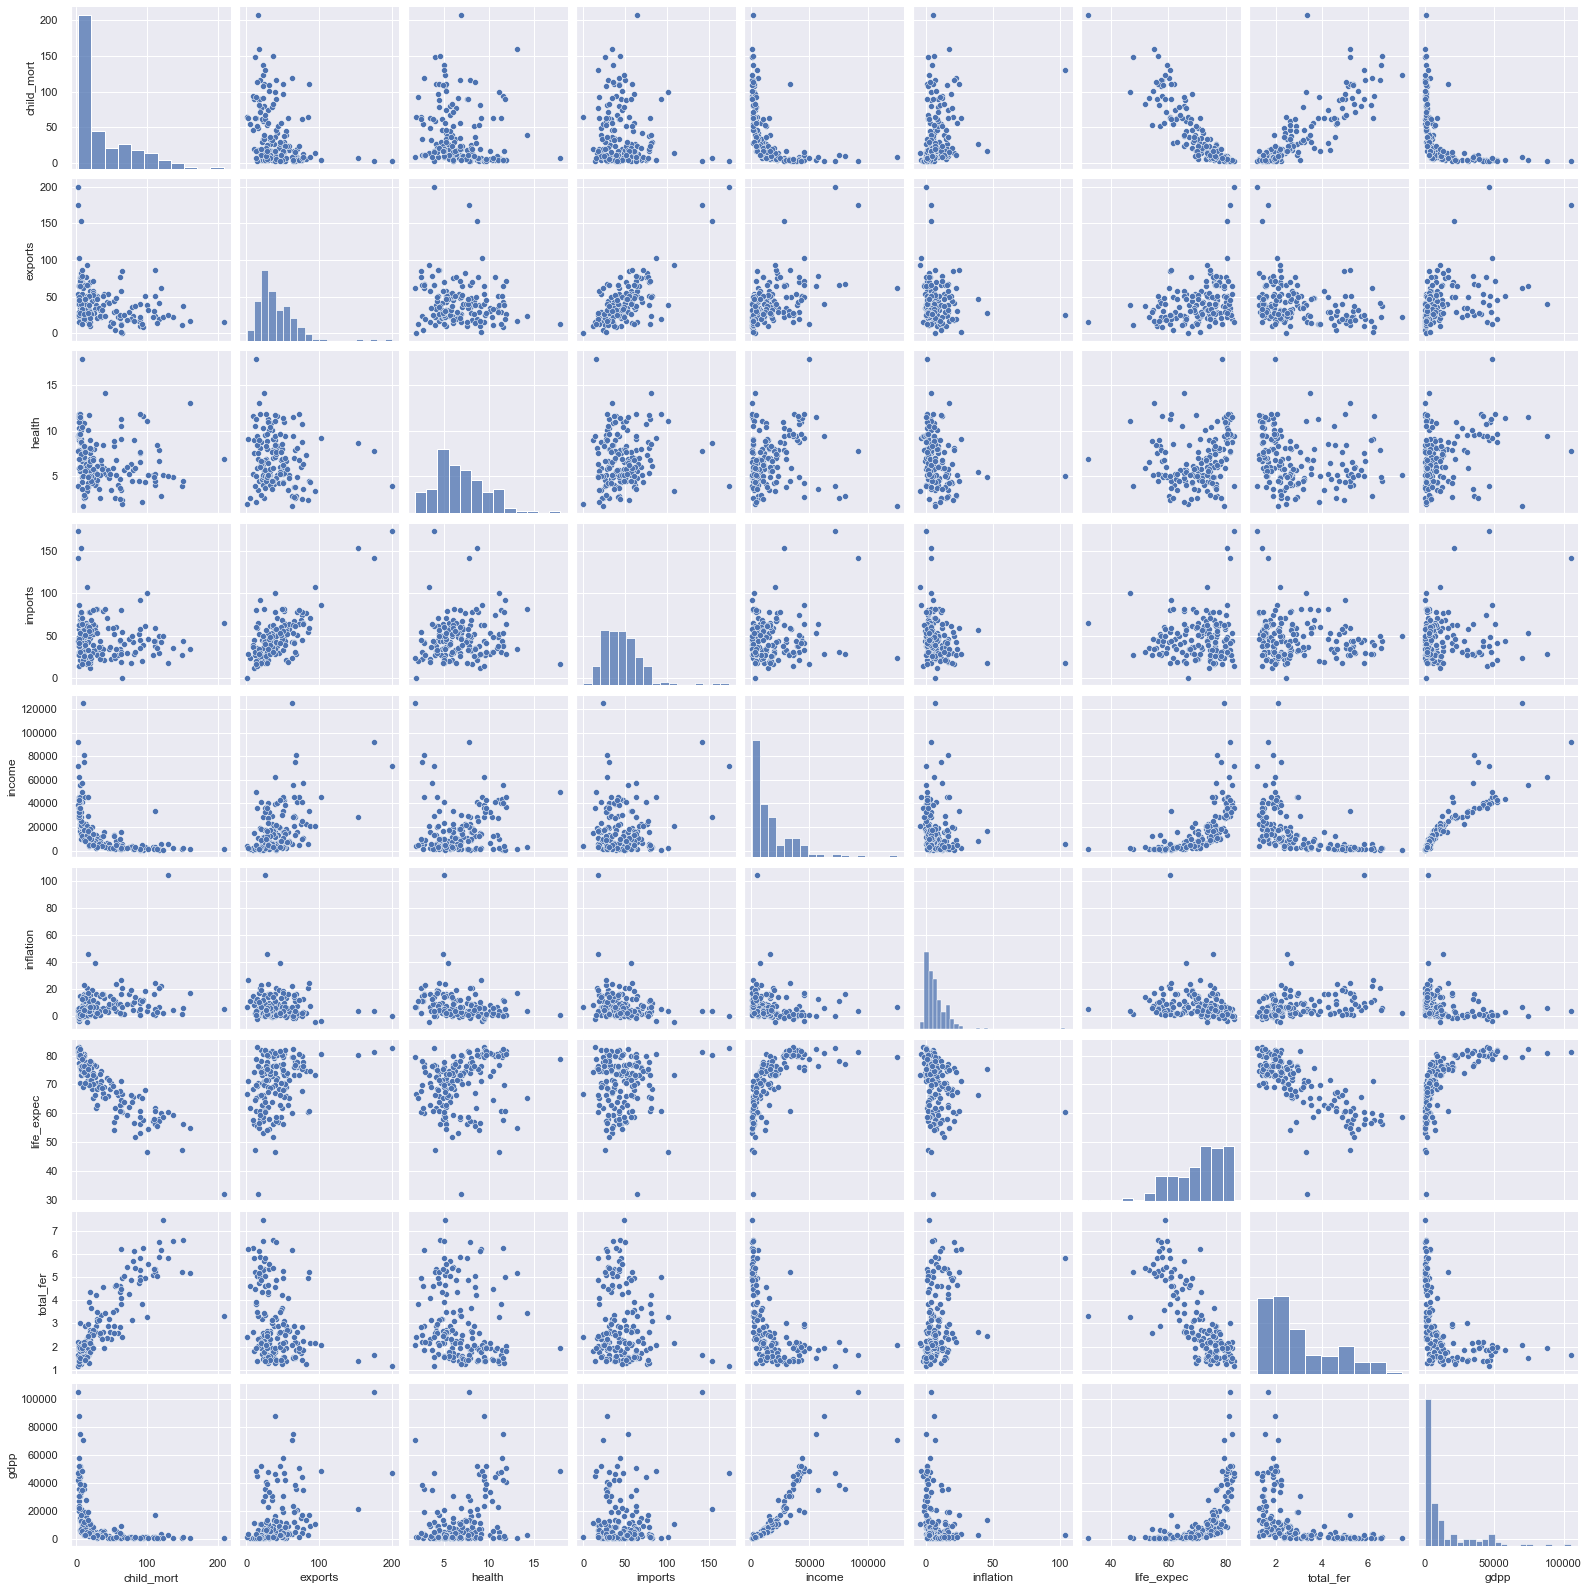

In [5]:
sns.pairplot(df)

In [6]:
def summary_table(df): #function to create an added information regarding the dataset
    summary = pd.DataFrame(dict(dataFeatures = df.columns,
                                  dataType = df.dtypes, #display datatype
                                  null = df.isna().sum(), #sum of null values
                                  null_percentage = round(df.isna().sum() / len(df) *100,2),#how many percente null values
                                  unique = df.nunique(),  #cek for number of unique values
                                  uniqueSample = [list(df[i].sample(3).drop_duplicates()) for i in df.columns] #3 random samples
                               )
                           ).reset_index(drop=True)
    summary['unique_percentage'] = round(summary['unique'] / len(df) *100,2) #convert unique to percentage values
    return summary

In [7]:
summary_table(df)

,dataFeatures,dataType,null,null_percentage,unique,uniqueSample,unique_percentage
0,country,object,0,0.0,167,"[Barbados, Mali, Micronesia, Fed. Sts.]",100.00
1,child_mort,float64,0,0.0,139,"[4.5, 7.8, 92.1]",83.23
2,exports,float64,0,0.0,147,"[12.4, 2.2, 54.3]",88.02
3,health,float64,0,0.0,147,"[6.22, 13.1, 11.5]",88.02
4,imports,float64,0,0.0,151,"[46.2, 34.9, 49.2]",90.42
5,income,int64,0,0.0,156,"[41100, 45400, 7880]",93.41
6,inflation,float64,0,0.0,156,"[1.44, 45.9, 0.6729999999999999]",93.41
7,life_expec,float64,0,0.0,127,"[53.1, 76.3, 47.5]",76.05
8,total_fer,float64,0,0.0,138,"[2.13, 1.39, 1.44]",82.63
9,gdpp,int64,0,0.0,157,"[595, 3310, 1310]",94.01


In [10]:
# Drop Kolom Country
df1 = df.copy()
df1.drop(columns=['country'], inplace=True)

In [12]:
df1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


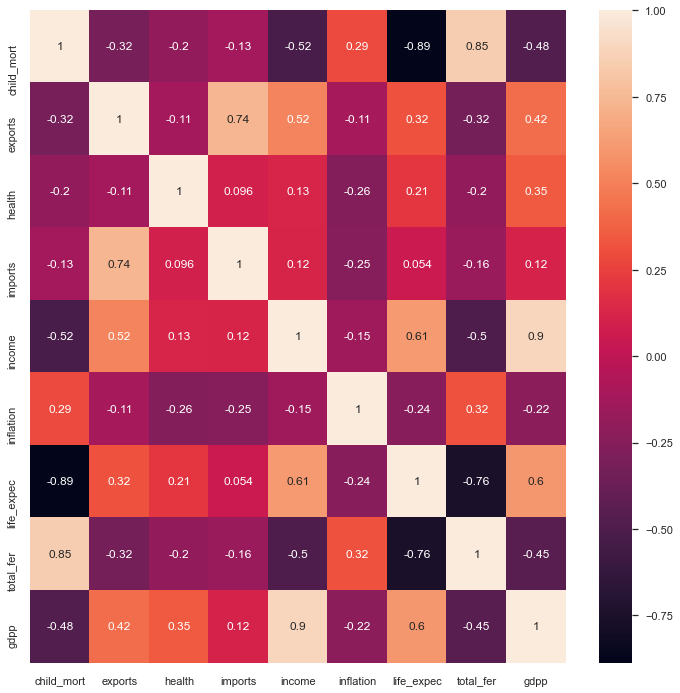

In [13]:
# Melihat korelasi antar fitur
plt.figure(figsize=(12,12))
df_corr = df1.corr()
sns.heatmap(df_corr, annot=True)

E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

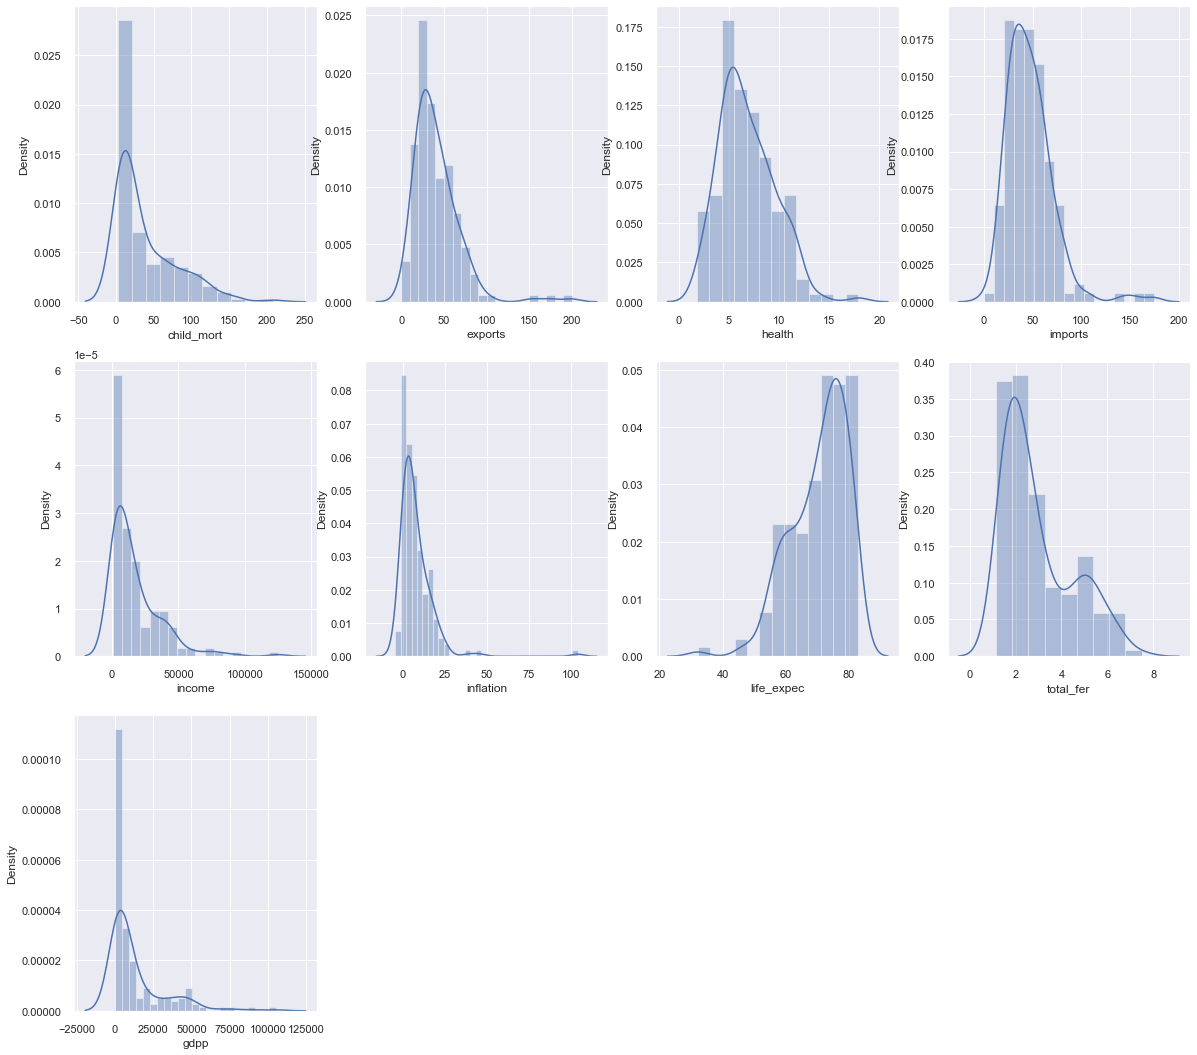

In [14]:
# Melihat kembali distribusi normal dataset
plt.figure(figsize = (20, 25))
feature_num = 1
for i in df1:
    if feature_num < 10:
        ax = plt.subplot(4, 4, feature_num)
        sns.distplot(df1[i])
        plt.xlabel(i, fontsize = 12)
        
    feature_num += 1
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [22]:
# Mengubah kolom export, import, health dari persentase ke nilai sebenarnya
df['exports'] = df['exports'] * df['gdpp'] / 100
df['imports'] = df['imports'] * df['gdpp'] / 100
df['health'] = df['health'] * df['gdpp'] / 100

In [23]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


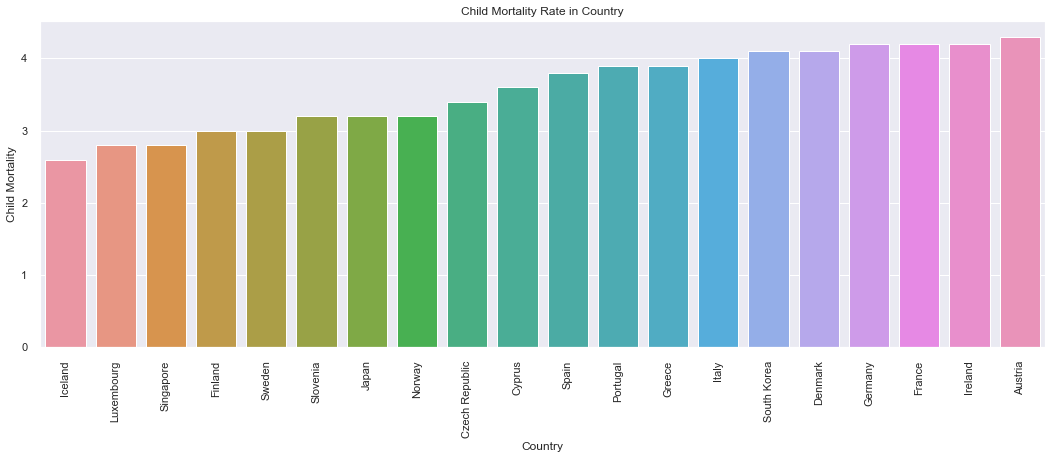

In [19]:
plt.figure(figsize=(18,6))
child_mort = df[['country', 'child_mort']].sort_values('child_mort', ascending=True).head(20)
ax = sns.barplot(x='country', y='child_mort', data=child_mort)
ax.set(xlabel = 'Country', ylabel='Child Mortality')
ax.set_title('Child Mortality Rate in Country')
plt.xticks(rotation = 90)
plt.show()

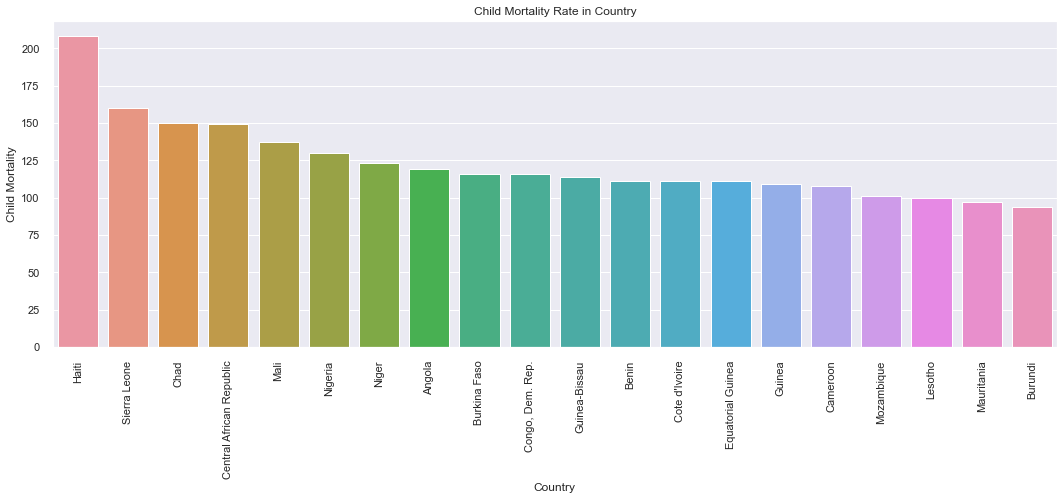

In [20]:
plt.figure(figsize=(18,6))
child_mort = df[['country', 'child_mort']].sort_values('child_mort', ascending=False).head(20)
ax = sns.barplot(x='country', y='child_mort', data=child_mort)
ax.set(xlabel = 'Country', ylabel='Child Mortality')
ax.set_title('Child Mortality Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Berdasarkan Tingkat Kematian Anak, untuk 20 negara terendah Child_Mort berada di angka 2-4, untuk 20 negara tertinggi Child_mort berada di 100-200**

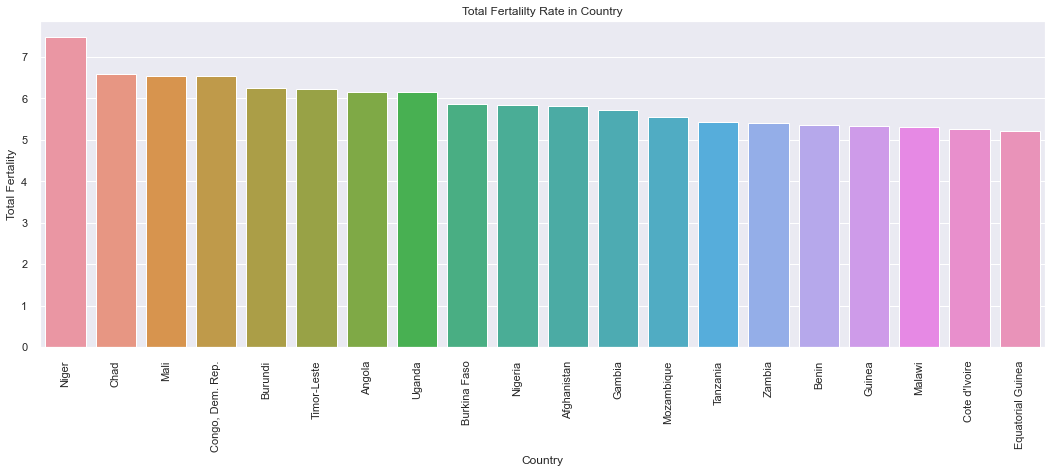

In [25]:
plt.figure(figsize=(18,6))
total_fer = df[['country', 'total_fer']].sort_values('total_fer', ascending=False).head(20)
ax = sns.barplot(x='country', y='total_fer', data=total_fer)
ax.set(xlabel = 'Country', ylabel='Total Fertality')
ax.set_title('Total Fertalilty Rate in Country')
plt.xticks(rotation = 90)
plt.show()

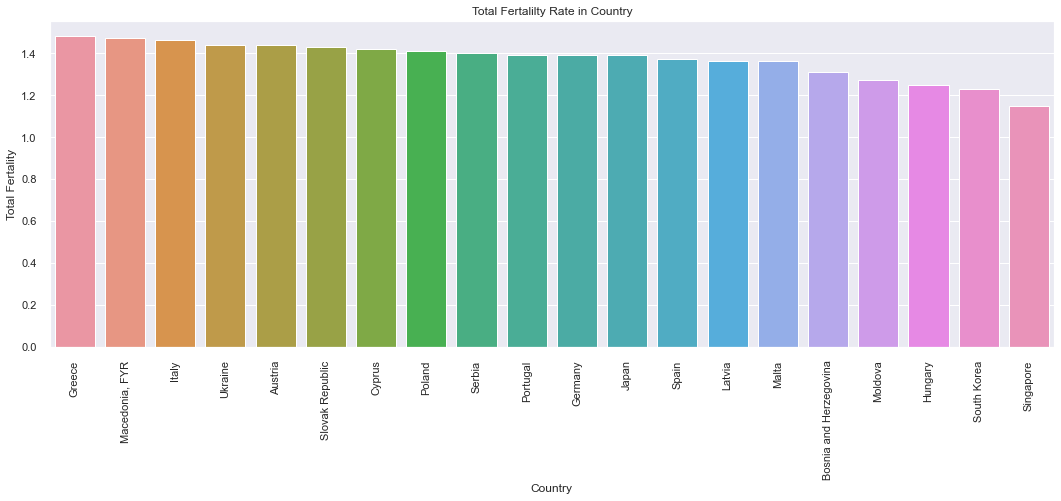

In [26]:
plt.figure(figsize=(18,6))
total_fer = df[['country', 'total_fer']].sort_values('total_fer', ascending=False).tail(20)
ax = sns.barplot(x='country', y='total_fer', data=total_fer)
ax.set(xlabel = 'Country', ylabel='Total Fertality')
ax.set_title('Total Fertalilty Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Berdasarkan Tingkat Kelahiran Anak, untuk 20 negara terendah Total_Fer berada di angka 1-1.5, untuk 20 negara tertinggi Total_Fer berada di 5-7**

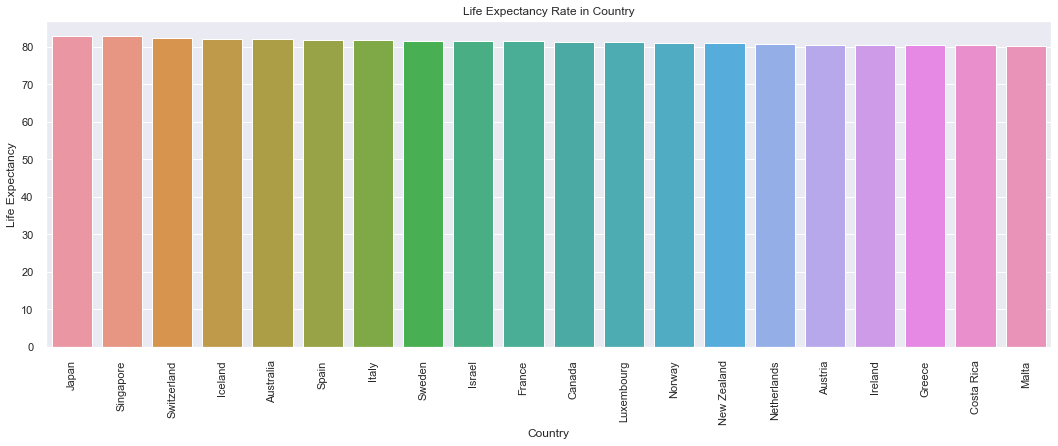

In [27]:
plt.figure(figsize=(18,6))
life_expec = df[['country', 'life_expec']].sort_values('life_expec', ascending=False).head(20)
ax = sns.barplot(x='country', y='life_expec', data=life_expec)
ax.set(xlabel = 'Country', ylabel='Life Expectancy')
ax.set_title('Life Expectancy Rate in Country')
plt.xticks(rotation = 90)
plt.show()

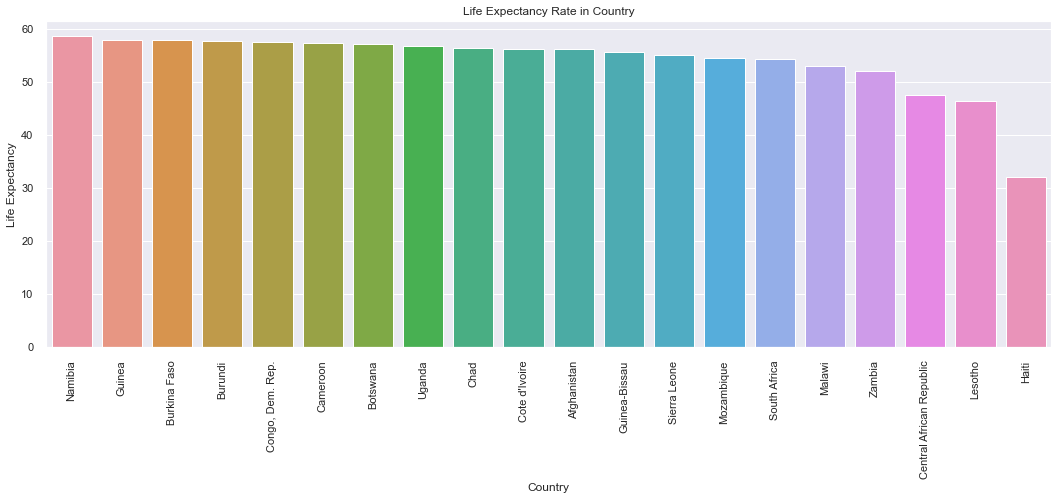

In [28]:
plt.figure(figsize=(18,6))
life_expec = df[['country', 'life_expec']].sort_values('life_expec', ascending=False).tail(20)
ax = sns.barplot(x='country', y='life_expec', data=life_expec)
ax.set(xlabel = 'Country', ylabel='Life Expectancy')
ax.set_title('Life Expectancy Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Berdasarkan Tingkat Angka Harapan Hidup, untuk 20 negara terendah Life_Expec berada di angka 30-60 tahun, untuk 20 negara tertinggi Life_Expec diatas 80 tahun**

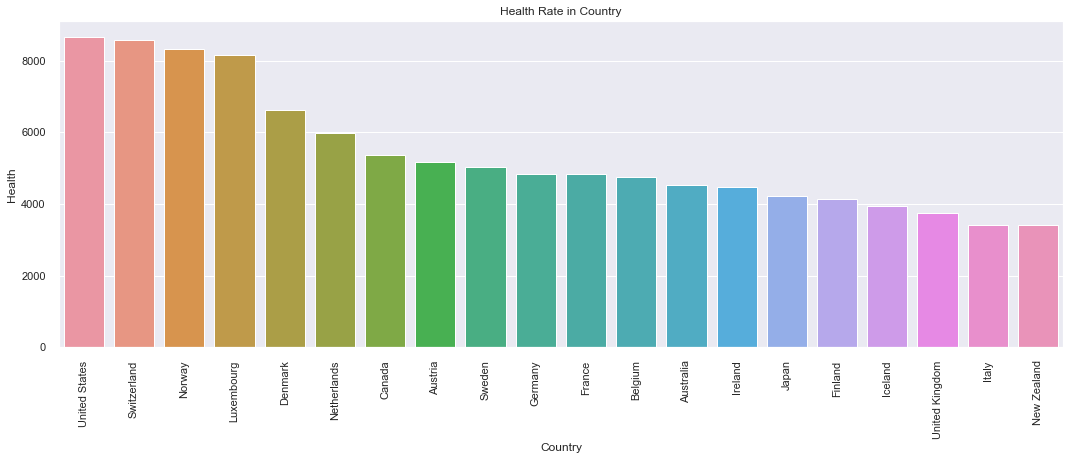

In [30]:
plt.figure(figsize=(18,6))
health = df[['country', 'health']].sort_values('health', ascending=False).head(20)
ax = sns.barplot(x='country', y='health', data=health)
ax.set(xlabel = 'Country', ylabel='Health')
ax.set_title('Health Rate in Country')
plt.xticks(rotation = 90)
plt.show()

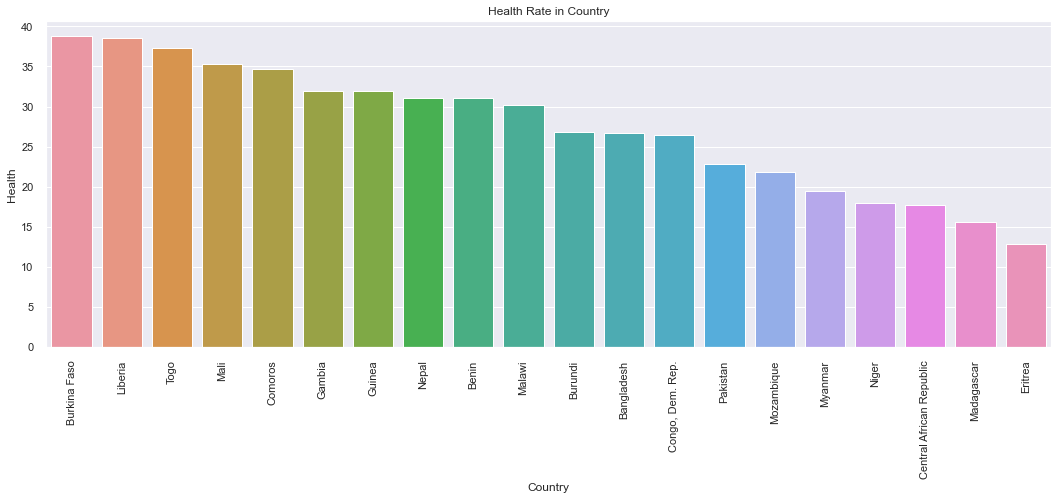

In [33]:
plt.figure(figsize=(18,6))
health = df[['country', 'health']].sort_values('health', ascending=False).tail(20)
ax = sns.barplot(x='country', y='health', data=health)
ax.set(xlabel = 'Country', ylabel='Health')
ax.set_title('Health Rate in Country')
plt.xticks(rotation = 90)
plt.show()

**Berdasarkan Tingkat Anggaran Kesehatan, untuk 20 negara terendah Health berada di angka 15-40 US Dollar, untuk 20 negara tertinggi Health berada di angka 4000-8000 US Dollar**

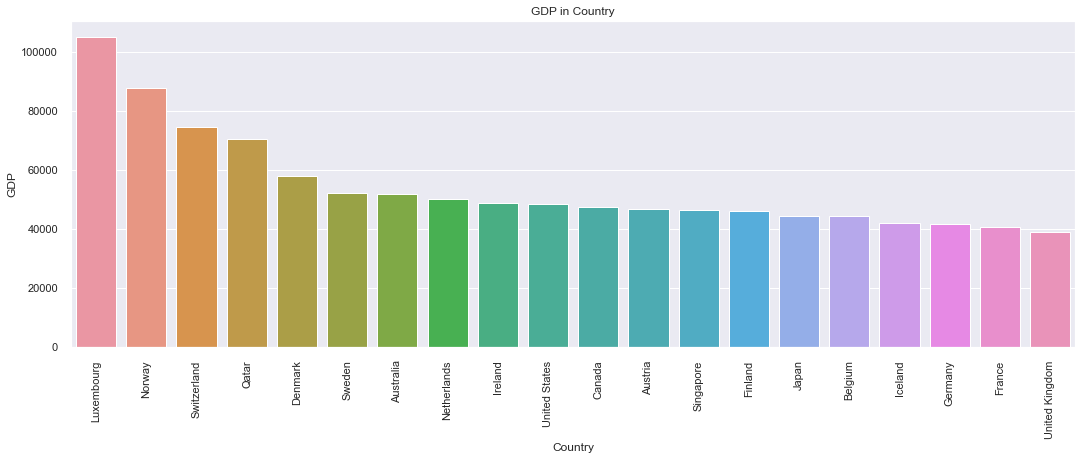

In [35]:
plt.figure(figsize=(18,6))
gdpp = df[['country', 'gdpp']].sort_values('gdpp', ascending=False).head(20)
ax = sns.barplot(x='country', y='gdpp', data=gdpp)
ax.set(xlabel = 'Country', ylabel='GDP')
ax.set_title('GDP in Country')
plt.xticks(rotation = 90)
plt.show()

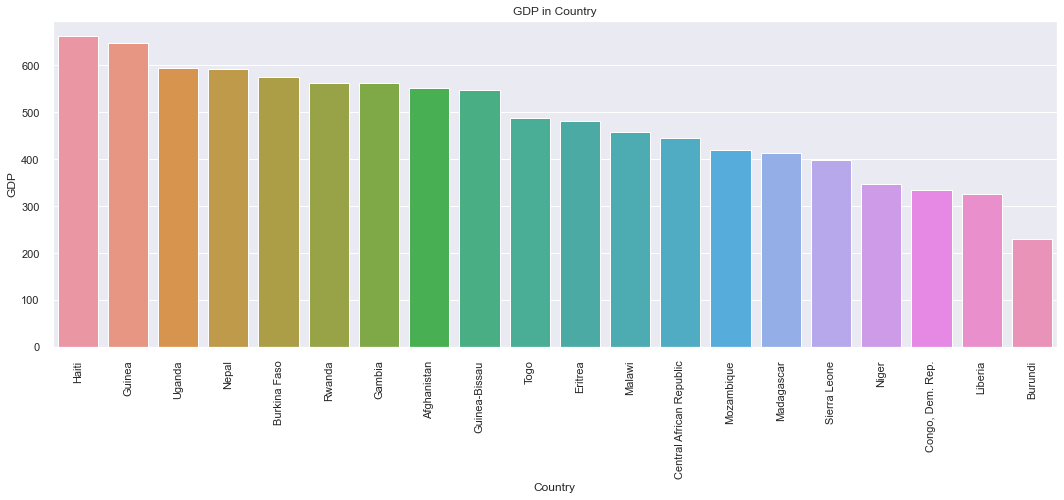

In [36]:
plt.figure(figsize=(18,6))
gdpp = df[['country', 'gdpp']].sort_values('gdpp', ascending=False).tail(20)
ax = sns.barplot(x='country', y='gdpp', data=gdpp)
ax.set(xlabel = 'Country', ylabel='GDP')
ax.set_title('GDP in Country')
plt.xticks(rotation = 90)
plt.show()

**Berdasarkan Nilai GDP, untuk 20 negara terendah GDP berada di angka 200-650 US Dollar, untuk 20 negara tertinggi GDP berada di angka 40000-110000 US Dollar**

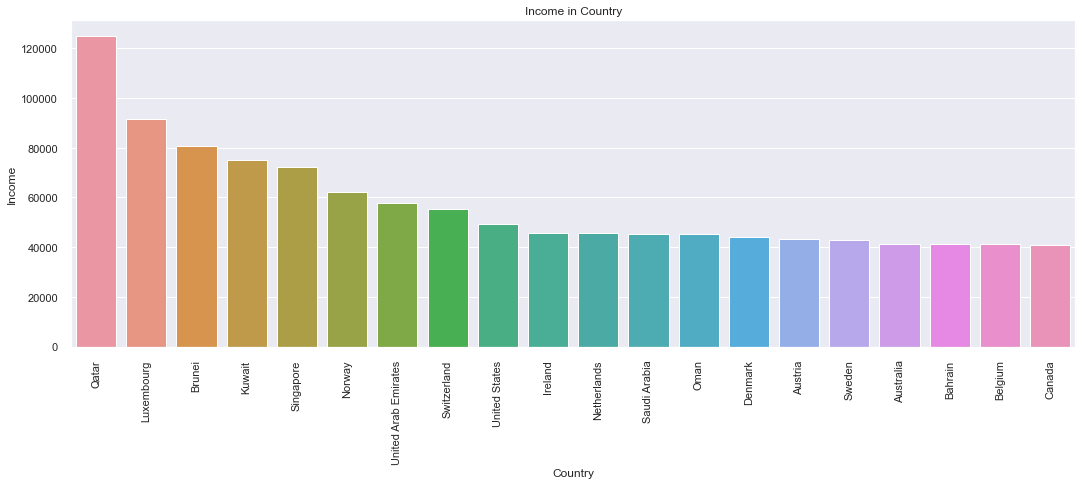

In [37]:
plt.figure(figsize=(18,6))
income = df[['country', 'income']].sort_values('income', ascending=False).head(20)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = 'Country', ylabel='Income')
ax.set_title('Income in Country')
plt.xticks(rotation = 90)
plt.show()

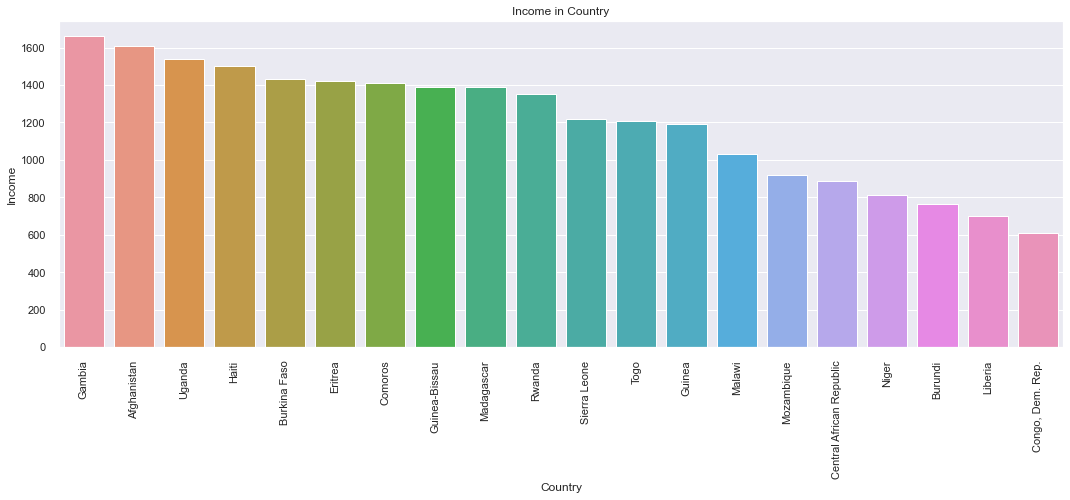

In [38]:
plt.figure(figsize=(18,6))
income = df[['country', 'income']].sort_values('income', ascending=False).tail(20)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = 'Country', ylabel='Income')
ax.set_title('Income in Country')
plt.xticks(rotation = 90)
plt.show()

**Berdasarkan Tingkat Kematian Anak, untuk 20 negara terendah Child_Mort berada di angka 2-4, untuk 20 negara tertinggi Child_mort berada di 100-200**

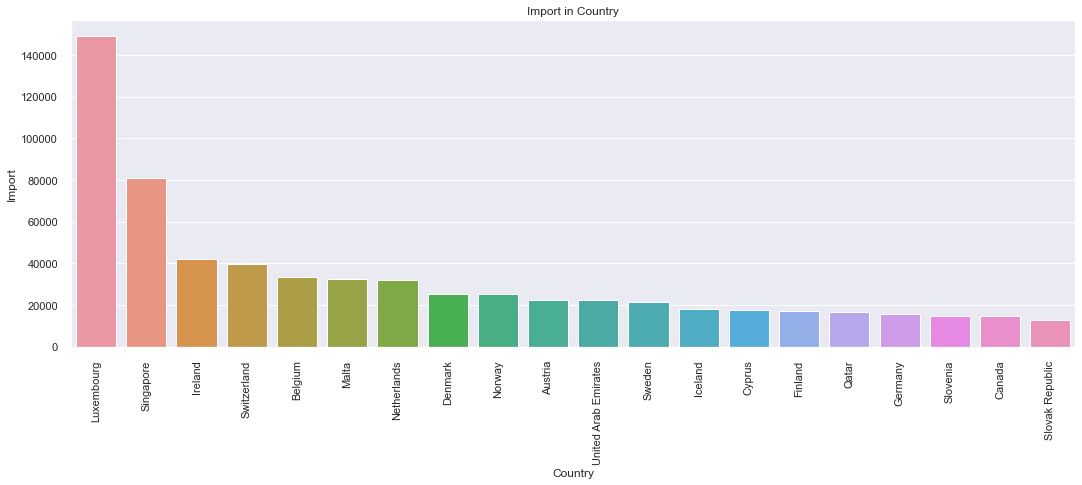

In [39]:
plt.figure(figsize=(18,6))
imports = df[['country', 'imports']].sort_values('imports', ascending=False).head(20)
ax = sns.barplot(x='country', y='imports', data=imports)
ax.set(xlabel = 'Country', ylabel='Import')
ax.set_title('Import in Country')
plt.xticks(rotation = 90)
plt.show()

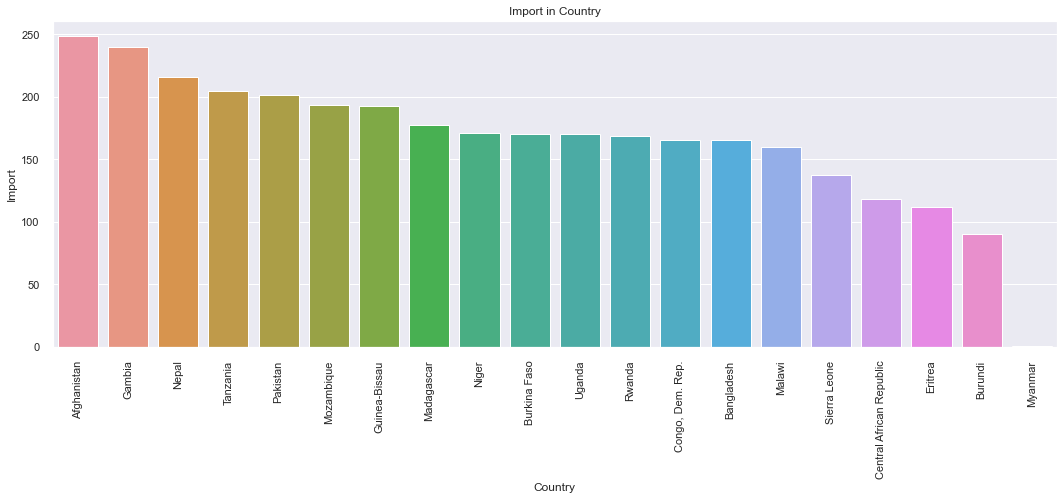

In [40]:
plt.figure(figsize=(18,6))
imports = df[['country', 'imports']].sort_values('imports', ascending=False).tail(20)
ax = sns.barplot(x='country', y='imports', data=imports)
ax.set(xlabel = 'Country', ylabel='Import')
ax.set_title('Import in Country')
plt.xticks(rotation = 90)
plt.show()

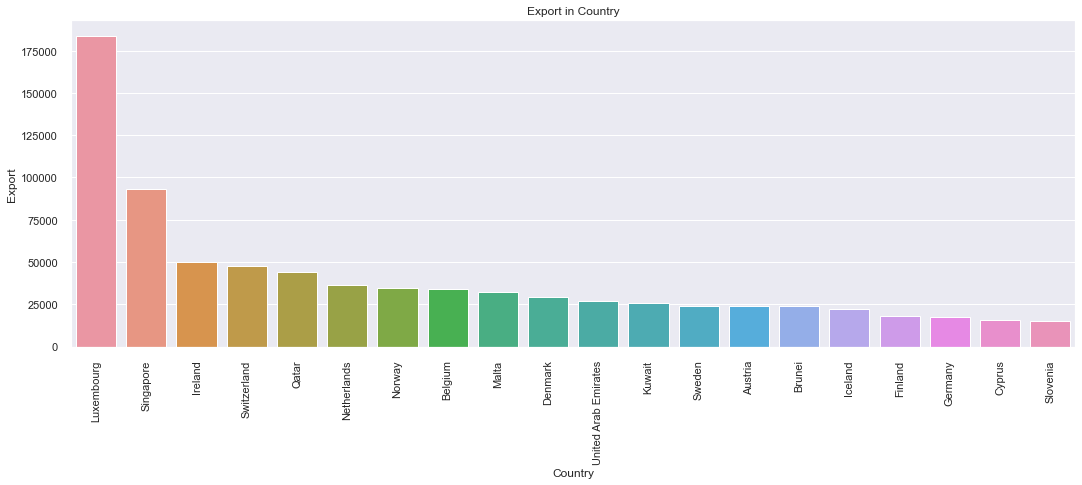

In [41]:
plt.figure(figsize=(18,6))
exports = df[['country', 'exports']].sort_values('exports', ascending=False).head(20)
ax = sns.barplot(x='country', y='exports', data=exports)
ax.set(xlabel = 'Country', ylabel='Export')
ax.set_title('Export in Country')
plt.xticks(rotation = 90)
plt.show()

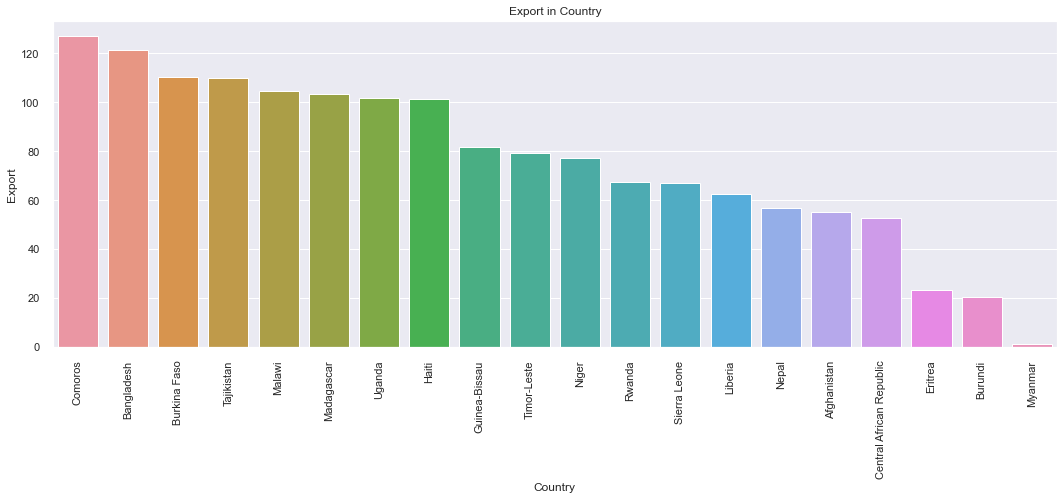

In [42]:
plt.figure(figsize=(18,6))
exports = df[['country', 'exports']].sort_values('exports', ascending=False).tail(20)
ax = sns.barplot(x='country', y='exports', data=exports)
ax.set(xlabel = 'Country', ylabel='Export')
ax.set_title('Export in Country')
plt.xticks(rotation = 90)
plt.show()

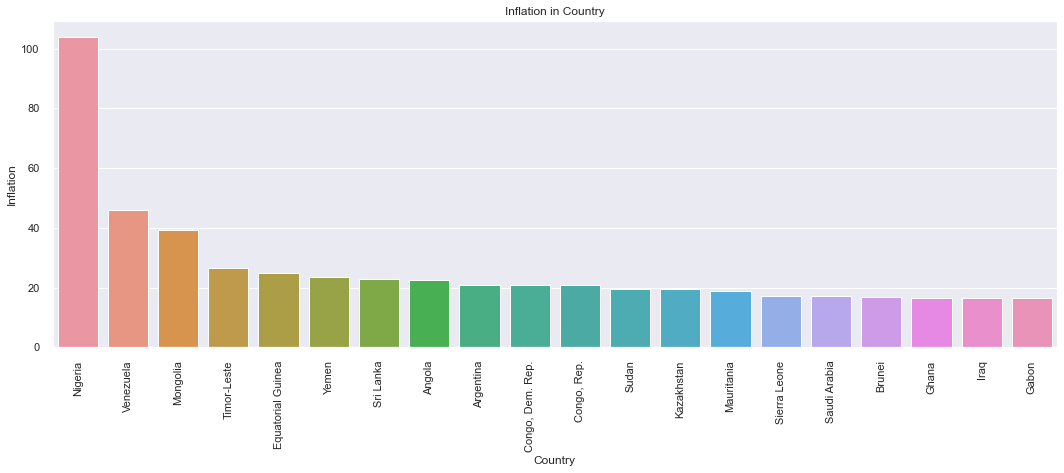

In [43]:
plt.figure(figsize=(18,6))
inflation = df[['country', 'inflation']].sort_values('inflation', ascending=False).head(20)
ax = sns.barplot(x='country', y='inflation', data=inflation)
ax.set(xlabel = 'Country', ylabel='Inflation')
ax.set_title('Inflation in Country')
plt.xticks(rotation = 90)
plt.show()

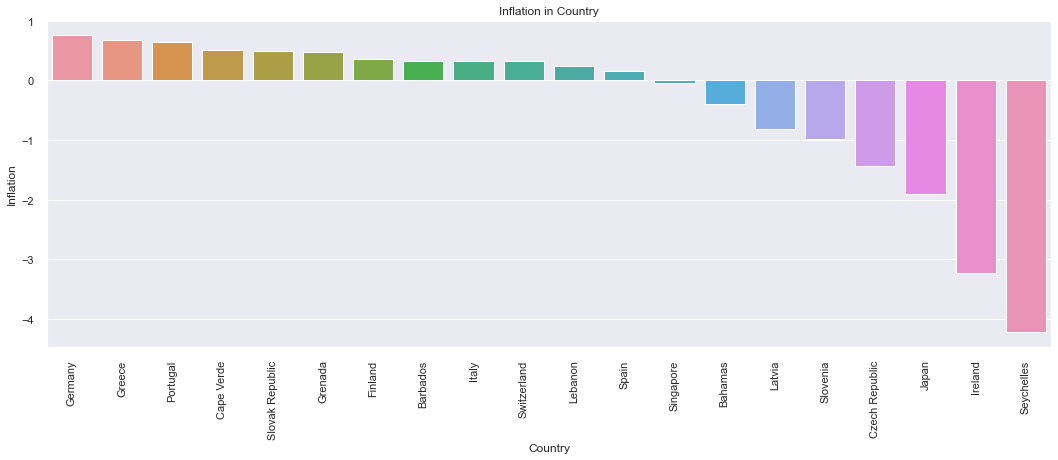

In [44]:
plt.figure(figsize=(18,6))
inflation = df[['country', 'inflation']].sort_values('inflation', ascending=False).tail(20)
ax = sns.barplot(x='country', y='inflation', data=inflation)
ax.set(xlabel = 'Country', ylabel='Inflation')
ax.set_title('Inflation in Country')
plt.xticks(rotation = 90)
plt.show()

In [47]:
df1 = df.copy()
df1.drop(columns=['country'], inplace=True)

In [53]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [54]:
# Hopkins score
Hopkins_score=round(hopkins(df1),2)

In [55]:
Hopkins_score

0.86

**Berdasarkan Hopkins score bahwa dataset ini layak untuk dibuat Clustering**

In [56]:
df_cluster = df1

## KMeans

E:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


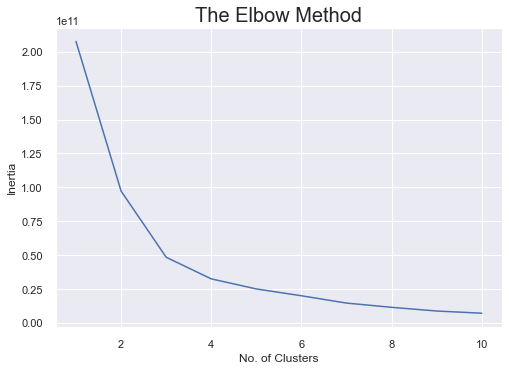

In [57]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, random_state = 42)
    km.fit(df_cluster)
    inertia.append(km.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')

plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


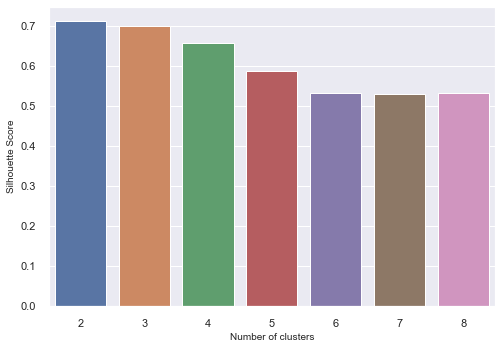

In [58]:
# silhouette coefficient
# standard: -1 s/d 1 => seberapa bagus model mendefinisikan cluster
from sklearn import metrics
silhouette_scores = [] 

for n_cluster in range(2, 9):
    silhouette_scores.append( 
        metrics.silhouette_score(df_cluster, 
                                 KMeans(n_clusters = n_cluster).fit_predict(df_cluster))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8] 
plots = sns.barplot(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show()

In [59]:
silhouette_scores

[0.7125869267098929,
 0.7010999403856035,
 0.6575209457955176,
 0.5879471866507604,
 0.5314887374931582,
 0.5294489297959951,
 0.5323801252799543]

In [60]:
km = KMeans(n_clusters = 2, random_state = 42)
cluster = km.fit_predict(df_cluster)

In [61]:
# mengetahui posisi centroids
center = km.cluster_centers_
center

array([[4.43957447e+01, 2.75327835e+03, 4.37208192e+02, 2.80150072e+03,
        1.08011560e+04, 8.64570922e+00, 6.87319149e+01, 3.16702128e+00,
        6.25683688e+03],
       [5.05000000e+00, 3.27319654e+04, 4.41646500e+03, 2.71247385e+04,
        5.15461538e+04, 3.09696154e+00, 8.04461538e+01, 1.76000000e+00,
        4.93384615e+04]])

In [62]:
df_cluster = df_cluster
df_cluster['cluster']=cluster

In [63]:
df_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0


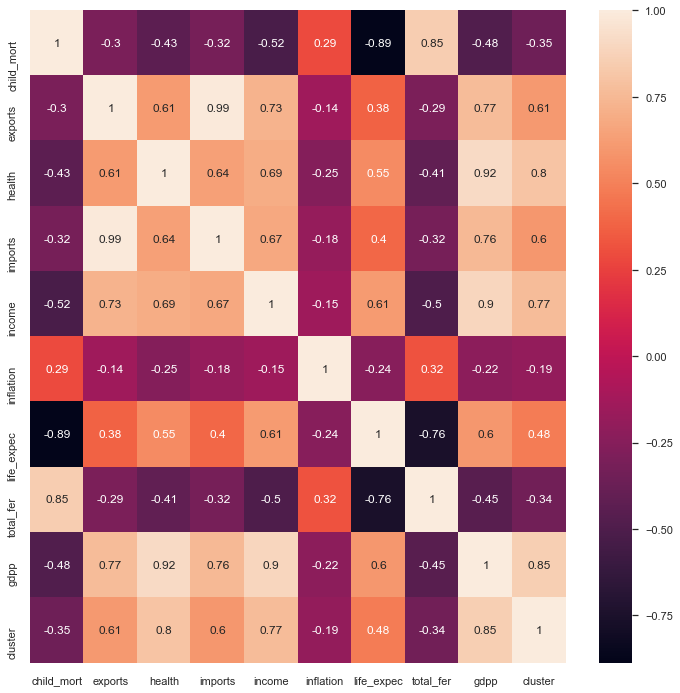

In [66]:
plt.figure(figsize=(12,12))
df_corr = df1.corr()
sns.heatmap(df_corr, annot=True)

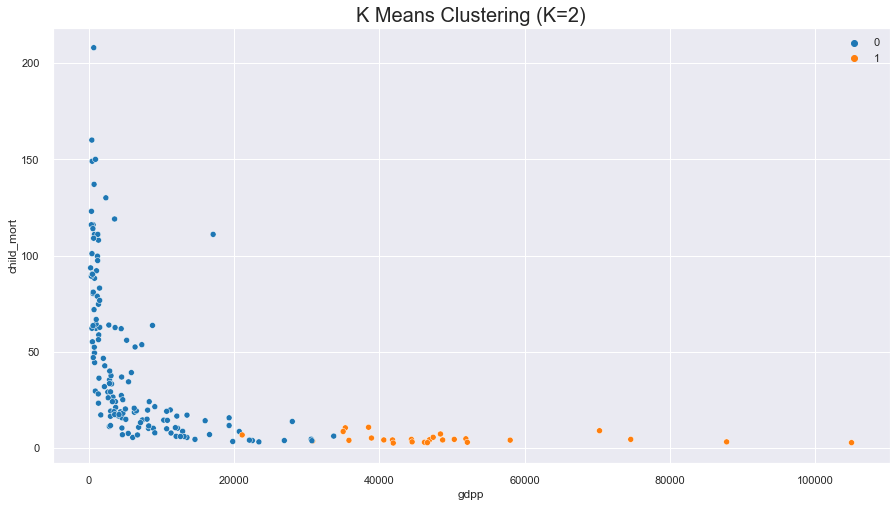

In [64]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='gdpp',y='child_mort', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
plt.legend()
plt.show()

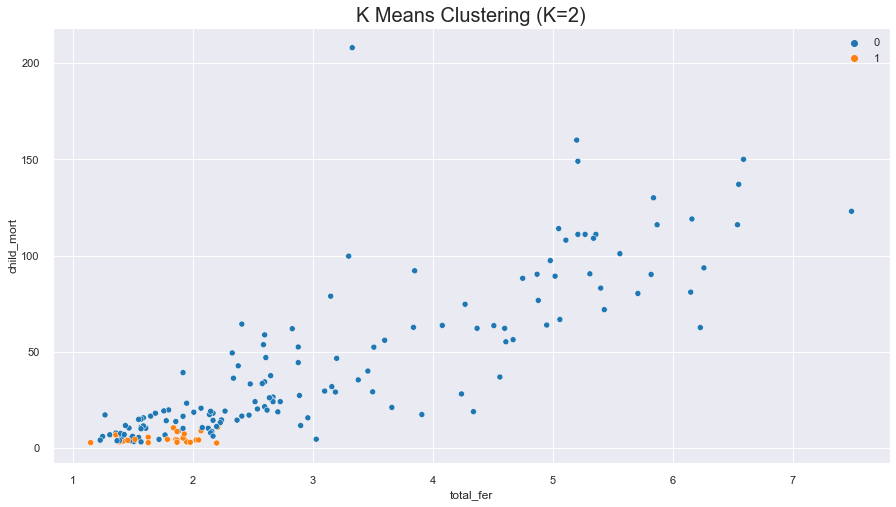

In [65]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='total_fer',y='child_mort', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
plt.legend()
plt.show()

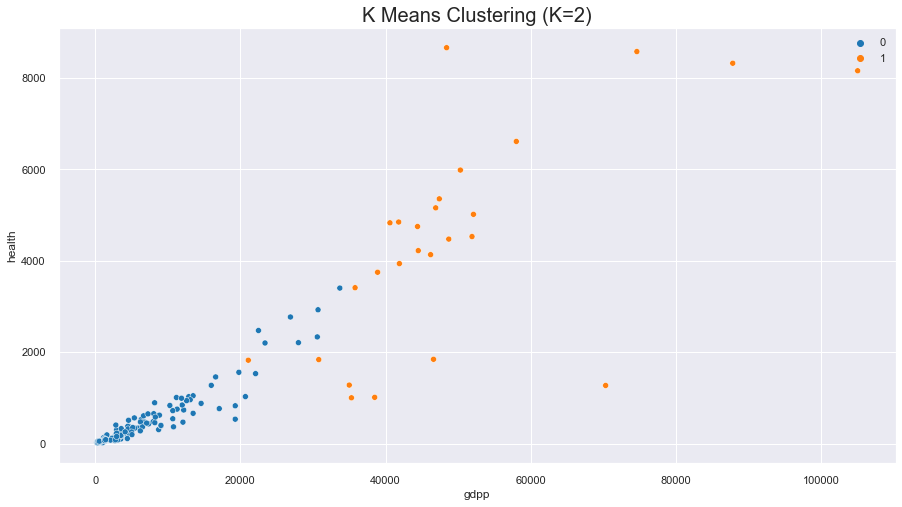

In [67]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_cluster, x='gdpp',y='health', hue='cluster', palette='tab10')
plt.title('K Means Clustering (K=2)', fontsize = 20)
plt.legend()
plt.show()

In [75]:
hasil2=df_cluster.groupby(['cluster']).agg({'child_mort':'mean', 'exports':'mean', 'health':'mean', 'imports':'mean',
                                           'income':'mean', 'inflation':'mean', 'life_expec':'mean',
                                           'total_fer':'mean', 'gdpp':'mean'}).reset_index()
hasil2

,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,44.395745,2753.278351,437.208192,2801.500724,10801.156028,8.645709,68.731915,3.167021,6256.836879
1,1,5.050000,32731.965385,4416.465000,27124.738462,51546.153846,3.096962,80.446154,1.760000,49338.461538


In [68]:
#Merge Country and Cluster
cluster_k = pd.concat([df['country'],df_cluster['cluster']], axis=1, join='outer')
cluster_k.sample(5)

,country,cluster
134,Slovak Republic,0
2,Algeria,0
118,Paraguay,0
78,Jordan,0
11,Bahrain,0


In [69]:
#Merge to Original Data
clustered_data_k = cluster_k.merge(df, on = 'country')
clustered_data_k.sample(5)

,country,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
29,Canada,1,5.6,13793.40,5356.200,14694.00,40700,2.870,81.3,1.63,47400
68,Iceland,1,2.6,22374.60,3938.600,18142.70,38800,5.470,82.0,2.20,41900
133,Singapore,1,2.8,93200.00,1845.360,81084.00,72100,-0.046,82.7,1.15,46600
65,Guyana,0,37.6,1562.56,163.552,2404.64,5840,5.730,65.5,2.65,3040
151,Tonga,0,17.4,440.20,179.985,2140.65,4980,3.680,69.9,3.91,3550


In [70]:
clustered_data_k[clustered_data_k.cluster == 0].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Czech Republic', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Fiji', 'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Greece', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel',
       'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon', 'L

In [71]:
clustered_data_k[clustered_data_k.cluster == 0].country.count()

141

In [72]:
clustered_data_k[clustered_data_k.cluster == 1].country.values

array(['Australia', 'Austria', 'Belgium', 'Brunei', 'Canada', 'Cyprus',
       'Denmark', 'Finland', 'France', 'Germany', 'Iceland', 'Ireland',
       'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands',
       'Norway', 'Qatar', 'Singapore', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

In [73]:
clustered_data_k[clustered_data_k.cluster == 1].country.count()

26

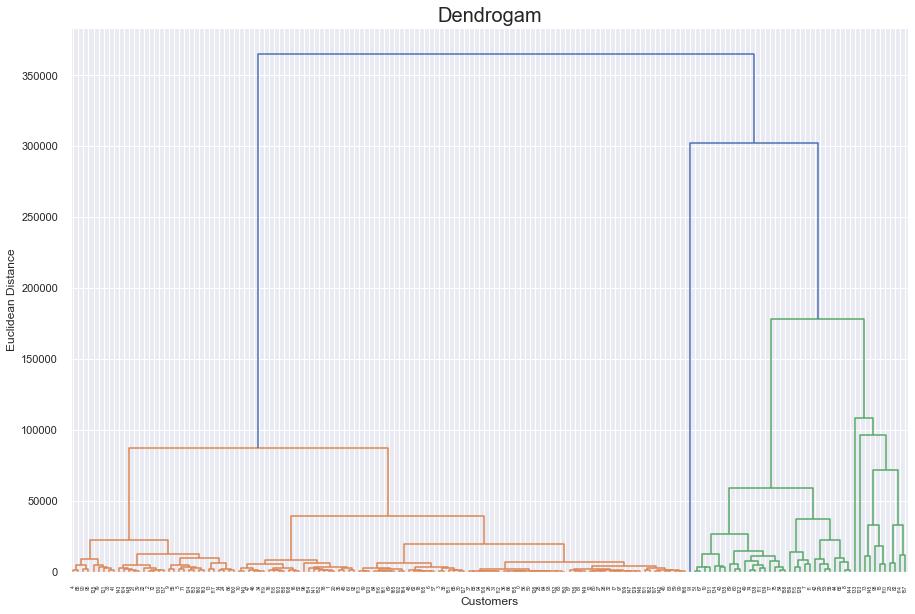

In [76]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendrogram = sch.dendrogram(sch.linkage(df1.iloc[:, [1, 2, 3, 4]], method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_cluster.drop(labels=['cluster'],axis=1))

In [78]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_cluster.drop(labels=['cluster'],axis=1))

In [80]:
df_cluster['cluster_hc']=cluster_hc

In [81]:
df_cluster

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster,cluster_hc
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,1
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,1
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...
162,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,1
163,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,1
164,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,1
165,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0,1


In [82]:
hasilhc=df_cluster.groupby(['cluster_hc']).agg({'child_mort':'mean', 'exports':'mean', 'health':'mean', 'imports':'mean',
                                           'income':'mean', 'inflation':'mean', 'life_expec':'mean',
                                           'total_fer':'mean', 'gdpp':'mean'}).reset_index()
hasilhc

,cluster_hc,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,8.338462,25451.176923,3574.395128,21389.623077,45289.743590,3.922744,79.358974,1.912821,40946.153846
1,1,47.389844,1926.933184,289.633087,2078.589860,8569.242188,8.957648,67.873437,3.263359,4438.390625


In [83]:
hasil2

,cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,44.395745,2753.278351,437.208192,2801.500724,10801.156028,8.645709,68.731915,3.167021,6256.836879
1,1,5.050000,32731.965385,4416.465000,27124.738462,51546.153846,3.096962,80.446154,1.760000,49338.461538


In [84]:
cluster_hc1 = pd.concat([df['country'],df_cluster['cluster_hc']], axis=1, join='outer')
cluster_hc1.sample(5)

,country,cluster_hc
70,Indonesia,1
97,Mali,1
135,Slovenia,0
24,Bulgaria,1
23,Brunei,0


In [85]:
#Merge to Original Data
clustered_data_hc = cluster_hc1.merge(df, on = 'country')
clustered_data_hc.sample(5)

,country,cluster_hc,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
58,Germany,0,4.2,17681.40,4848.800,15507.80,40400,0.758,80.1,1.39,41800
85,Latvia,1,7.8,6068.10,754.840,6226.30,18300,-0.812,73.1,1.36,11300
49,Equatorial Guinea,0,111.0,14671.80,766.080,10071.90,33700,24.900,60.9,5.21,17100
61,Grenada,1,14.6,1754.06,431.882,3626.04,11200,0.480,71.3,2.24,7370
87,Lesotho,1,99.7,460.98,129.870,1181.70,2380,4.150,46.5,3.30,1170


In [87]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].country.values

array(['Australia', 'Austria', 'Bahamas', 'Bahrain', 'Belgium', 'Brunei',
       'Canada', 'Cyprus', 'Czech Republic', 'Denmark',
       'Equatorial Guinea', 'Finland', 'France', 'Germany', 'Greece',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait',
       'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway',
       'Oman', 'Portugal', 'Qatar', 'Saudi Arabia', 'Singapore',
       'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland',
       'United Arab Emirates', 'United Kingdom', 'United States'],
      dtype=object)

In [88]:
clustered_data_hc[clustered_data_hc.cluster_hc == 0].country.count()

39

In [89]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].country.values

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Madagascar', 'Malawi

In [90]:
clustered_data_hc[clustered_data_hc.cluster_hc == 1].country.count()

128